# Survival Prediction on Titanic Dataset Using Decision Trees

## Importing important libraries

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import missingno as msno
import math, time, random, datetime
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Project Outline

### Understanding the nature of data
   <ul>
   <li> Visualization of null values </li>
   <li>Checking relevance of every feature with target feature "Survival"</li>
   <li> Handling missing data using appropriate strategies </li>
   <li>Correlation between the metrices</li>
   <li> Explore interesting themes:</li>
        - Did the wealthy had stronger chances of survival?
        - Which age group had a stronger chances of survival?
        - Did passengers travelling with family had a stronger chances of survival?
    <li>Survival prediction model using Decision Trees Classification algorithm </li>
     <li>Improving the model performance through Hyperparameter Tuning using GridSearchCV to obtain an improved accuracy </li>
    </ul>

## Loading the data


In [33]:
train=pd.read_csv("train.csv")

## Understanding data

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.shape

(891, 12)

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking missing values

### Using the Missingno library

<Axes: >

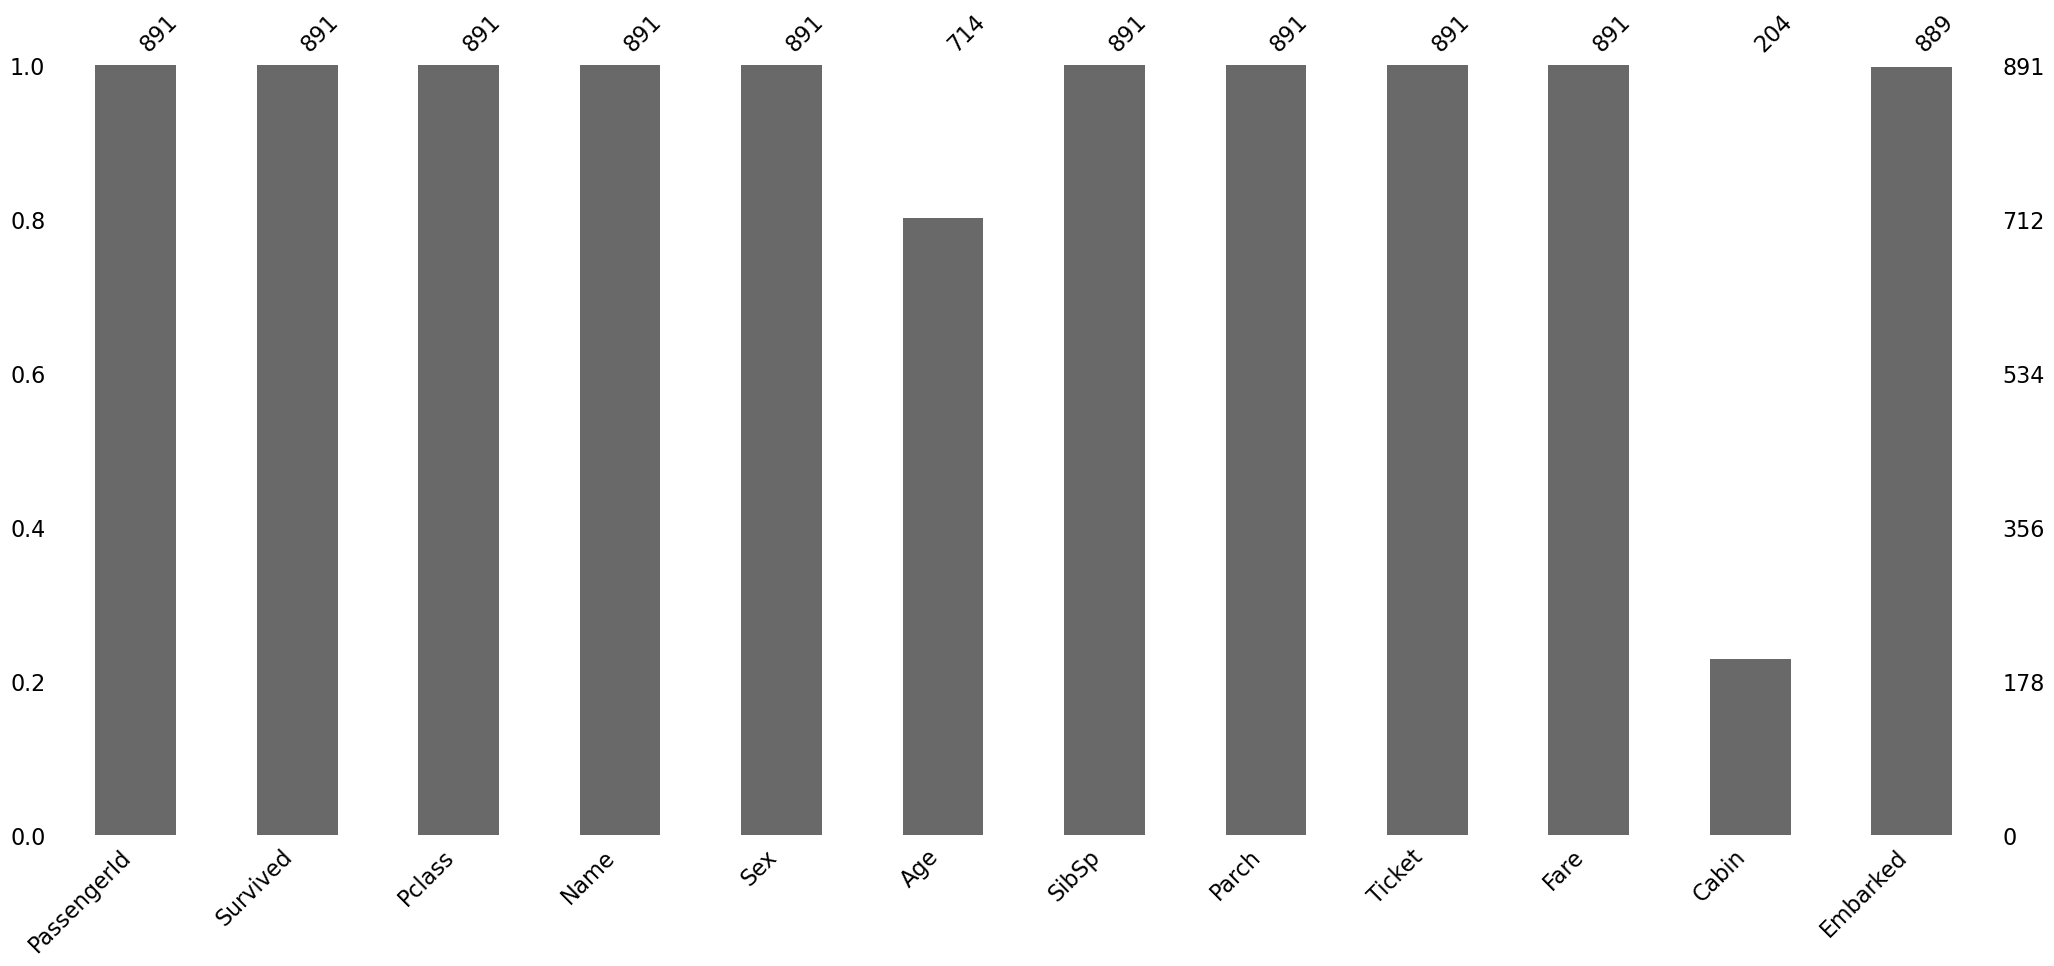

In [15]:
#Bar chart
msno.bar(train)

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Target Feature: Survived
### Description: Whether a person survived or not
 0: Did not survive; 1: Survived
### How many people survived?

0    549
1    342
Name: Survived, dtype: int64


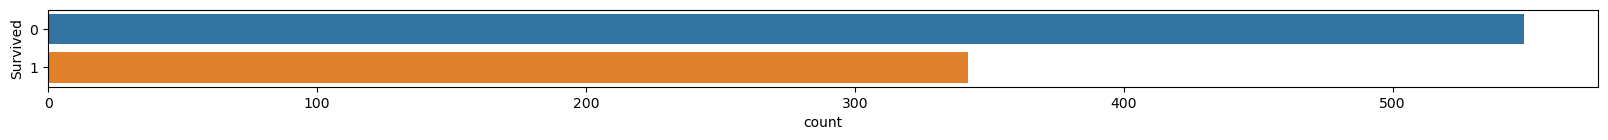

In [21]:
fig=plt.figure(figsize=(20,1))
sns.countplot(y="Survived",data=train)
print (train.Survived.value_counts() )

## Feature: Pclass
#### Description: Ticket class of the passenger.
#### Key: 1 = 1st, 2 = 2nd, 3 = 3rd
### Relavance of the feature:

In [29]:
train.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\529266429.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(train.Pclass)


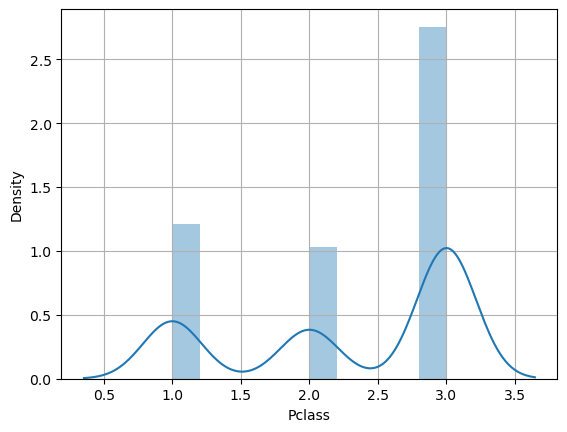

In [32]:
g = sns.distplot(train.Pclass)
g.grid();

###
Passangers travelling in Pclass 3 is the major chunk, as evident from the probability distribution function above.

In [37]:
print("null values: ", train.Pclass.isnull().sum())

null values:  0


### NOTE: 
Although the feature "Pclass" is numerical (1,2 and 3) but they are categories. Therefore, this is a categorical feature

In [38]:
train.Pclass.dtype

dtype('int64')

In [39]:
train.Pclass=train.Pclass.astype("object")

In [40]:
train.Pclass.dtype

dtype('O')

## Feature: Name

## Relavance of the feature:
Logically, the name of a person wouldn't have an effect on the chances of their survival, but the
important information in this feature is the salutations (Mr., Mrs. etc.). Therefore, we will keep this
feature for further analysis.

### Checking for duplicate names:

In [41]:
train.Name.duplicated().sum()

0

###### Therefore, all names are unique.

In [43]:
train.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

### Let's make columns with salutations
<ul>
   <li>Mr. </li>
   <li>Mrs. </li>
   <li>Miss. </li>
   <li>Master. </li>
   <li>Dr. </li>
</ul>

In [44]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
train['Title'] = ''
for i in range(len(train)):
    if ("Mr." in train['Name'][i]):
        train['Title'][i] = 'Mr'
    elif ("Mrs." in train['Name'][i]):
        train['Title'][i] = "Mrs"
    elif ("Miss." in train['Name'][i]):
        train['Title'][i] = "Miss"
    elif ("Master." in train['Name'][i]):
        train['Title'][i] = "Master"
    elif ("Dr." in train['Name'][i]):
        train['Title'][i] = "Dr"
train.head()

C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\222626092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'][i] = 'Mr'
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\222626092.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'][i] = "Mrs"
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\222626092.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'][i] = "Miss"
C:\Users\ayamo\AppData\Local

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


###### 
As we can see above, the column "Title" has been added to the dataframe with respective
salutations. This will help us categorize the names further as we proceed.

Let's check if every name has one of these salutations or not.

In [58]:
x=[]
for i in range(len(train)):
   if ('Mr.' in train["Name"][i] or
      'Mrs.' in train["Name"][i] or
      'Miss.' in train["Name"][i] or
      'Master.' in train["Name"][i] or
      'Dr.' in train["Name"][i]):
      continue
   else:
    x.append(train["Name"][i])
print("Total Name with other Titles:",len(x),"\n\nName with other titles:")
x

Total Name with other Titles: 20 

Name with other titles:


['Uruchurtu, Don. Manuel E',
 'Byles, Rev. Thomas Roussel Davids',
 'Bateman, Rev. Robert James',
 'Carter, Rev. Ernest Courtenay',
 'Aubart, Mme. Leontine Pauline',
 'Reynaldo, Ms. Encarnacion',
 'Peuchen, Major. Arthur Godfrey',
 'Butt, Major. Archibald Willingham',
 'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")',
 'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")',
 'Kirkland, Rev. Charles Leonard',
 'Sagesser, Mlle. Emma',
 'Simonius-Blumer, Col. Oberst Alfons',
 'Weir, Col. John',
 'Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")',
 'Crosby, Capt. Edward Gifford',
 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)',
 'Reuchlin, Jonkheer. John George',
 'Harper, Rev. John',
 'Montvila, Rev. Juozas']

### Following observations have been found:                                                                    
<ul>
   <li>Mme. is a french title equivalent to "Mrs.". We will change the name 'Aubart, Mme. Leontine
Pauline' to 'Aubart, Mrs. Leontine Pauline' </li>
   <li> Ms. is an abbreviation for "Miss.". Therefore we will change the name 'Reynaldo, Ms.
Encarnacion' to 'Reynaldo, Miss. Encarnacion' </li>
   <li>Mlle. is a french title equivalent to "Miss.". We will change the names: </li>
   
          -'Sagesser, Mlle. Emma' to 'Sagesser, Miss. Emma'
          -'Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")' to Mayne, Miss. Berthe Antonine ("Mrs de Villiers")'                                                                 
</ul>

In [60]:
train["Name"] = train["Name"].str.replace("Ms.","Miss.", regex = True)
train["Name"] = train["Name"].str.replace("Mme.","Mrs.", regex = True)
train["Name"] = train["Name"].str.replace("Mlle.","Miss.", regex = True)

In [62]:
L = [] 
for i in range(len(train)):
    if ("Mr." in train['Name'][i] or
       "Mrs." in train['Name'][i] or
       "Miss." in train['Name'][i] or
       "Master." in train['Name'][i] or
       "Dr." in train['Name'][i]):
        continue
    else:
        L.append(train['Name'][i])
print ("Total Names with Other Titles:",len(L),"\n\nNames with other titles:")
L

Total Names with Other Titles: 16 

Names with other titles:


['Uruchurtu, Don. Manuel E',
 'Byles, Rev. Thomas Roussel Davids',
 'Bateman, Rev. Robert James',
 'Carter, Rev. Ernest Courtenay',
 'Peuchen, Major. Arthur Godfrey',
 'Butt, Major. Archibald Willingham',
 'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")',
 'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")',
 'Kirkland, Rev. Charles Leonard',
 'Simonius-Blumer, Col. Oberst Alfons',
 'Weir, Col. John',
 'Crosby, Capt. Edward Gifford',
 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)',
 'Reuchlin, Jonkheer. John George',
 'Harper, Rev. John',
 'Montvila, Rev. Juozas']

### Let's put these as "Other_Titles" in the title column.

In [66]:
for i in range(len(train)):
    if ("Mr." in train['Name'][i] or
        "Mrs." in train['Name'][i] or
        "Miss." in train['Name'][i] or
        "Master." in train['Name'][i] or
        "Dr." in train['Name'][i]):
        continue
    else:
        train['Title'][i] = "Other"
train.head()

C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\3692571288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'][i] = "Other"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [69]:
train.Title.describe()

count     891
unique      7
top        Mr
freq      517
Name: Title, dtype: object

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 90.6+ KB


### Feature: Sex
Relavance of the feature:

In [71]:
train.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [72]:
train["Sex"].isnull().sum()

0

In [73]:
train["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

### Let's change the "male" and "female" to "1" and "0" respectively, for analysis purposes.

In [74]:
for i in range(len(train)):
    if (train["Sex"][i] == 'male'):
        train["Sex"][i] = train["Sex"][i].replace("male","1")
    else:
        train["Sex"][i] = train["Sex"][i].replace("female","0")

C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\3189518870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][i] = train["Sex"][i].replace("male","1")
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\3189518870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][i] = train["Sex"][i].replace("female","0")


In [75]:
train.Sex.unique()

array(['1', '0'], dtype=object)

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


### Feature: Age
Relevance of the feature:

C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\3918594064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"][train["Survived"]==0], color='b',bins = 15)
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\3918594064.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"][tr

<Axes: xlabel='Age', ylabel='Density'>

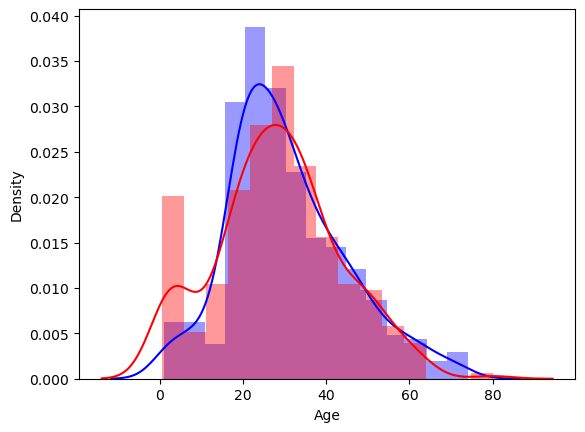

In [84]:
sns.distplot(train["Age"][train["Survived"]==0], color='b',bins = 15)
sns.distplot(train["Age"][train["Survived"]==1], color="r",bins = 15)

#### Note: Blue graph is for "Unsurvived" = 0 and Red is for "Survived" = 1

Following is evident from the graphs:
<ul>
     <li> The feature seems to be following a normal distribution. </li>

  <li>Most of the kids (age 0 to about 15 years) seem to have survived</li>
     <li>More passengers between the age of 20 and 30 years to have died rather than survived.</li>
</ul>
        
The pattern we can see here is that passengers with very less age have survived more than died, and
opposite is the case for passengers with ages between 20 and 30 years.

Therefore, age seems to have an impact on the survival probability.

In [186]:
train.Age.describe()

count    891.000000
mean      29.762144
std       13.280454
min        0.420000
25%       21.800000
50%       30.000000
75%       35.800000
max       80.000000
Name: Age, dtype: float64

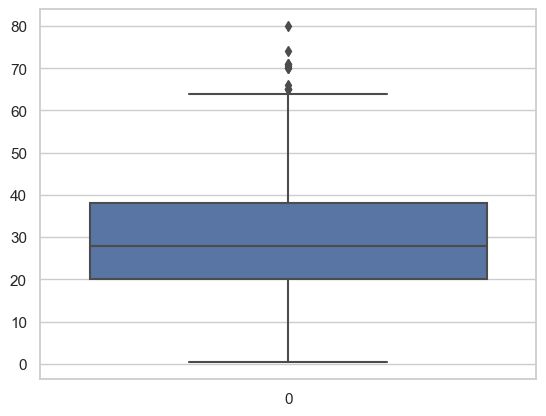

In [103]:
sns.set_theme(style="whitegrid")
sns.boxplot(train["Age"], width = 0.8)
plt.show()

In [104]:
train[train["Age"]>63].count()

PassengerId    13
Survived       13
Pclass         13
Name           13
Sex            13
Age            13
SibSp          13
Parch          13
Ticket         13
Fare           13
Cabin           6
Embarked       13
Title          13
dtype: int64

In [105]:
train["Age"].isnull().sum()

177

#### Since there are many null values in the column, let's impute them.

In order to have a finer estimation, we'll find out the mean age according to the title and impute
values accordingly

In [113]:
mr_age = []
for i in range(len(train)):
        if ("Mr." in train["Name"][i]):
            mr_age.append(train["Age"][i])
mrs_age = []
for i in range(len(train)):
    if ("Mrs." in train["Name"][i]):
        mrs_age.append(train["Age"][i])
 
miss_age = []
for i in range(len(train)):
    if ("Miss." in train["Name"][i]):
        miss_age.append(train["Age"][i])
master_age = []
for i in range(len(train)):
      if ("Master." in train["Name"][i]):
        master_age.append(train["Age"][i])

other_age = []
for i in range(len(train)):
    if ("Mr." in train['Name'][i] or
        "Mrs." in train['Name'][i] or
        "Miss." in train['Name'][i] or
        "Master." in train['Name'][i]):
        continue
    else:
        other_age.append(train['Age'][i])

In [114]:
mr_age_df = pd.Series(mr_age)
mrs_age_df = pd.Series(mrs_age)
miss_age_df = pd.Series(miss_age)
master_age_df = pd.Series(master_age)
other_age_df = pd.Series(other_age)

0      22.0
1      35.0
2       NaN
3      54.0
4      20.0
       ... 
512    33.0
513    28.0
514    25.0
515    26.0
516    32.0
Length: 517, dtype: float64

In [118]:
mr_age_df_mean = round((mr_age_df.mean()),1)
mrs_age_df_mean = round((mrs_age_df.mean()),1)
miss_age_df_mean = round((miss_age_df.mean()),1)
master_age_df_mean = round((master_age_df.mean()),1)
other_age_df_mean = round((other_age_df.mean()),1)
print("Mr. mean age:", mr_age_df_mean, "\nMrs. mean age:", mrs_age_df_mean,"\nMiss. mean"
 ,miss_age_df_mean,"\nMaster. mean age:",master_age_df_mean,"\nOther mean age:",other_age_df_mean)

Mr. mean age: 32.4 
Mrs. mean age: 35.8 
Miss. mean 21.8 
Master. mean age: 4.6 
Other mean age: 45.5


In [119]:

Age_null_list = list(train["Age"].isnull())
a = 0
b = 0
c = 0
d = 0
e = 0
for i in range(len(train)):
  if (("Mr." in train["Name"][i]) and (Age_null_list[i] is True)):
      a = a + 1
      train["Age"][i] = mr_age_df_mean
  elif (("Mrs." in train["Name"][i]) and (Age_null_list[i] is True)):
       b = b + 1
       train["Age"][i] = mrs_age_df_mean
  elif (("Miss." in train["Name"][i]) and (Age_null_list[i] is True)):
       c = c + 1
       train["Age"][i] = miss_age_df_mean
  elif (("Master." in train["Name"][i]) and (Age_null_list[i] is True)):
       d = d + 1
       train["Age"][i] = master_age_df_mean
  elif (Age_null_list[i] is True):
       e = e + 1
       train["Age"][i] = other_age_df_mean
print("Mr. null age total:",a,"\nMrs. null age total:",b,"\nMiss. null age total:",c,
 "\nMaster. null age total:",d,"\nOther null age total:",e)


Mr. null age total: 119 
Mrs. null age total: 17 
Miss. null age total: 36 
Master. null age total: 4 
Other null age total: 1


C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\2322379991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Age"][i] = mr_age_df_mean
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\2322379991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Age"][i] = mrs_age_df_mean
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\2322379991.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Age"][i] = miss_age_df_mea

In [120]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",1,32.4,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [123]:
Age_null_list = list(train["Age"].isnull())
a = 0
b = 0
c = 0
d = 0
e = 0
for i in range(len(train)):
 if (("Mr." in train["Name"][i]) and (Age_null_list[i] is True)):
      a = a + 1
 elif (("Mrs." in train["Name"][i]) and (Age_null_list[i] is True)):
       b = b + 1
 elif (("Miss." in train["Name"][i]) and (Age_null_list[i] is True)):
      c = c + 1
 elif (("Master." in train["Name"][i]) and (Age_null_list[i] is True)):
      d = d + 1
 elif (Age_null_list[i] is True):
     e = e + 1
print("Mr. null age total:",a,"\nMrs. null age total:",b,"\nMiss. null age total:",c,
 "\nMaster. null age total:",d,"\nOther null age total:",e)

Mr. null age total: 0 
Mrs. null age total: 0 
Miss. null age total: 0 
Master. null age total: 0 
Other null age total: 0


#### No null values now!

In [124]:
train.Age.describe()

count    891.000000
mean      29.762144
std       13.280454
min        0.420000
25%       21.800000
50%       30.000000
75%       35.800000
max       80.000000
Name: Age, dtype: float64

### Feature: SibSp

Relevance of the feature:

In [125]:
train.groupby(["SibSp"])["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

As the number of siblings/spouse increases, the chances of survival decreases. Therefore, these is a
mathematical correlation between "SibSp" and "Survival".

In [126]:
train["SibSp"].isnull().sum()

0

In [127]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Feature: Parch
Relevance of the feature:

In [129]:
train.groupby(["Parch"])["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

For the feature "Parch", it is again evident that passengers with higher number of parents/children
have lesser chances of survival. Therefore, there is a mathematical correlation between "Parch" and
"Survival".

In [131]:
train.Parch.isnull().sum()

0

In [132]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [133]:
train.Parch.dtype

dtype('int64')

### Let's check some data sanity!
Passengers with "Miss." and "Master." salutations should not have "Parch" feature with value
greater than 2.

In [134]:
n=0
m=0
for i in range(len(train)):
    if("Miss." in train["Name"][i] and (train["Parch"][i]>2)):
        n=n+1
    elif ("Master." in train["Name"][i] and (train["Parch"][i]>2)):
        m=m+1
print('\"Miss." with \"Parch" > 2:',n,'\n\"Master." with \"Parch" > 2:',m)

"Miss." with "Parch" > 2: 0 
"Master." with "Parch" > 2: 0


### Merging "SibSp" and "Parch":
To simplify the model, let us merge the two feature into one: "Family".

In [135]:
train["Family"] = train["SibSp"] + train["Parch"]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [136]:
train.groupby(["Family"])["Survived"].mean()

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

Following conclusions can be made from the results above:
If a person is travelling alone, there's a 30% chance of survival.
<ul>
     <li> If a person is travelling alone, there's a 30% chance of survival.</li>
<li>People with 1, 2 or 3 family members have comparitively higher survival chances.
</li>
     <li>People with 3, 4 or 5 family members have declining survival chances</li>
    <li> People travelling with 7 or 10 family members have 0 survival chances.</li>
</ul>
As we can see categories here, let's make a new column called "Family_Size" and categorize the
family into:
<ul>
     <li>Alone</li>
     <li>Small</li>
     <li>Medium</li>
    <li>Large </li>

</ul>

In [143]:
def calculate (number):
    if number == 0:
        return "Alone"
    elif number > 0 and number < 4:
        return "Small"
    elif number > 3 and number < 7:
        return "Medium"
    else:
        return "Large"
train["Family_Size"]=train["Family"].apply(calculate)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Small
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Small
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Alone


### Feature: Ticket
#### Relevance of the feature:
To check the relevance of the feature, let's categorize the tickets to get the best results.


In [145]:
print("Null values:", train.Ticket.isnull().sum())
print("Data type:",train.Ticket.dtype)

Null values: 0
Data type: object


In [146]:
train.Ticket.nunique()

681

In [147]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

We see there are majorly 2 types of tickets.
<ul>
     <li>Alphanumeric</li>
     <li>Numeric</li>
</ul>

In [149]:
# Alphanumeric tickets
L = []
for i in range(len(train)):
   if (train['Ticket'][i].isdigit() == False):
      L.append(train['Ticket'][i])
        
Li = pd.Series(L)
print("Total:",Li.nunique(),'\n',Li.unique())

Total: 167 
 ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' 'PP 9549' 'A/5. 2151'
 'PC 17601' 'PC 17569' 'C.A. 24579' 'PC 17604' 'A./5. 2152'
 'SC/Paris 2123' 'S.C./A.4. 23567' 'A/4. 39886' 'PC 17572' 'C.A. 31026'
 'C.A. 34651' 'CA 2144' 'PC 17605' 'C.A. 29395' 'S.P. 3464' 'C.A. 33111'
 'S.O.C. 14879' 'SO/C 14885' 'W./C. 6608' 'SOTON/OQ 392086' 'W.E.P. 5734'
 'C.A. 2315' 'PC 17754' 'PC 17759' 'STON/O 2. 3101294' 'PC 17558'
 'A4. 54510' 'C 17369' 'SOTON/O.Q. 3101307' 'A/5. 3337' 'C.A. 29178'
 'SC/PARIS 2133' 'PC 17593' 'STON/O2. 3101279' 'C.A. 33112' 'S.O.P. 1166'
 'A.5. 11206' 'A/5. 851' 'Fa 265302' 'PC 17597' 'SOTON/OQ 392090'
 'CA. 2343' 'C.A. 33595' 'PC 17318' 'STON/O 2. 3101280' 'PC 17595' 'LINE'
 'SC/PARIS 2131' 'PC 17610' 'A/5 3540' 'SOTON/O.Q. 3101311' 'F.C.C. 13528'
 'A/5 21174' 'STON/O2. 3101283' 'W/C 14208' 'SOTON/OQ 392089' 'PP 4348'
 'SW/PP 751' 'A/5 21173' 'C.A. 29566' 'W./C. 6609' 'C.A. 31921'
 'SCO/W 1585' 'W./C. 14263' 'STON/O 2. 3101275' 'A/5. 3336' 'PC 17585'
 'PC 17755' 

In [150]:
import re
L1 = []
for i in range(len(train)):
  if (train['Ticket'][i].isdigit() == False):
     train['Ticket'][i] = re.sub('A/5\.','A/5',train["Ticket"][i])
     train['Ticket'][i] = re.sub('A\./5\.','A/5',train["Ticket"][i])
     train['Ticket'][i] = re.sub('A\.5\.','A/5',train["Ticket"][i])
     train['Ticket'][i] = re.sub('C\.A\.','CA',train["Ticket"][i])
     train['Ticket'][i] = re.sub('A/4\.','A/4',train["Ticket"][i])
     train['Ticket'][i] = re.sub('A4\.','A/4',train["Ticket"][i])
     train['Ticket'][i] = re.sub('CA\.','CA',train["Ticket"][i])
     train['Ticket'][i] = re.sub('W\.E\.P\.','WEP',train["Ticket"][i])
     train['Ticket'][i] = re.sub('S\.P\.','SP',train["Ticket"][i])
     train['Ticket'][i] = re.sub('SOTON/O2','STON/O2',train["Ticket"][i])
     train['Ticket'][i] = re.sub('STON/O2\.','STON/O2',train["Ticket"][i])
     train['Ticket'][i] = re.sub('SOTON/O\.Q\.','SOTON/OQ',train["Ticket"][i])
     train['Ticket'][i] = re.sub('F\.C\.C\.','FCC',train["Ticket"][i])
     train['Ticket'][i] = re.sub('W\./C\.','W/C',train["Ticket"][i])
     train['Ticket'][i] = re.sub('S\.C\./PARIS','SC/PARIS',train["Ticket"][i])
     train['Ticket'][i] = re.sub('F\.C\.','FC',train["Ticket"][i])
     train['Ticket'][i] = re.sub('S\.O\.C\.','SOC',train["Ticket"][i])
     train['Ticket'][i] = re.sub('S\.O\.P\.','SOP',train["Ticket"][i])
     train['Ticket'][i] = re.sub('Fa','FA',train["Ticket"][i])
     train['Ticket'][i] = re.sub('S\.O\./P\.P\.','SO/PP',train["Ticket"][i])
     train['Ticket'][i] = re.sub('S\.W\./PP','SW/PP',train["Ticket"][i])
     train['Ticket'][i] = re.sub('S\.C\./A\.4\.','SC/A4',train["Ticket"][i])
     train['Ticket'][i] = re.sub('STON/O 2\.','STON/O2',train["Ticket"][i])
     L1.append(train['Ticket'][i])
Lii = pd.Series(L1)
print("Total:",Lii.nunique(),'\n',Lii.unique())

C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\737532123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket'][i] = re.sub('A/5\.','A/5',train["Ticket"][i])
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\737532123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket'][i] = re.sub('A\./5\.','A/5',train["Ticket"][i])
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\737532123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Total: 167 
 ['A/5 21171' 'PC 17599' 'STON/O2 3101282' 'PP 9549' 'A/5 2151' 'PC 17601'
 'PC 17569' 'CA 24579' 'PC 17604' 'A/5 2152' 'SC/Paris 2123' 'SC/A4 23567'
 'A/4 39886' 'PC 17572' 'CA 31026' 'CA 34651' 'CA 2144' 'PC 17605'
 'CA 29395' 'SP 3464' 'CA 33111' 'SOC 14879' 'SO/C 14885' 'W/C 6608'
 'SOTON/OQ 392086' 'WEP 5734' 'CA 2315' 'PC 17754' 'PC 17759'
 'STON/O2 3101294' 'PC 17558' 'A/4 54510' 'C 17369' 'SOTON/OQ 3101307'
 'A/5 3337' 'CA 29178' 'SC/PARIS 2133' 'PC 17593' 'STON/O2 3101279'
 'CA 33112' 'SOP 1166' 'A/5 11206' 'A/5 851' 'FA 265302' 'PC 17597'
 'SOTON/OQ 392090' 'CA 2343' 'CA 33595' 'PC 17318' 'STON/O2 3101280'
 'PC 17595' 'LINE' 'SC/PARIS 2131' 'PC 17610' 'A/5 3540'
 'SOTON/OQ 3101311' 'FCC 13528' 'A/5 21174' 'STON/O2 3101283' 'W/C 14208'
 'SOTON/OQ 392089' 'PP 4348' 'SW/PP 751' 'A/5 21173' 'CA 29566' 'W/C 6609'
 'CA 31921' 'SCO/W 1585' 'W/C 14263' 'STON/O2 3101275' 'A/5 3336'
 'PC 17585' 'PC 17755' 'CA 17248' 'PC 17582' 'PC 17760' 'PC 17596'
 'CA 2673' 'A/5 10482' 'S

In [151]:
train['Ticket_type'] = ""
for i in range(len(train)):
 if (train['Ticket'][i].isdigit() == False):
     train['Ticket_type'][i] = train['Ticket'][i].split(" ")[0]
 
print(train['Ticket_type'].unique(),'\n\nTotal: ',train['Ticket_type'].nunique())

['A/5' 'PC' 'STON/O2' '' 'PP' 'CA' 'SC/Paris' 'SC/A4' 'A/4' 'SP' 'SOC'
 'SO/C' 'W/C' 'SOTON/OQ' 'WEP' 'C' 'SC/PARIS' 'SOP' 'FA' 'LINE' 'FCC'
 'SW/PP' 'SCO/W' 'P/PP' 'SC' 'SC/AH' 'A/S' 'WE/P' 'SO/PP' 'FC' 'CA/SOTON'] 

Total:  31


C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\3754128254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket_type'][i] = train['Ticket'][i].split(" ")[0]


As we can see here, there is a null unique element too. This is natural because we still have the
numeric tickets to be added in this newly made column Ticket_type.

Till now, we have checked for tickets starting with a code or a string.

Let's now check for the other tickets too.

In [153]:
L2 = []
for i in range(len(train)):
 if (train['Ticket'][i].isdigit() == True):
    if (len(train['Ticket'][i]) == 6):
       train["Ticket_type"][i] = "6_Digit_Number"
    elif (len(train['Ticket'][i]) == 5):
       train["Ticket_type"][i] = "5_Digit_Number"
    elif (len(train['Ticket'][i]) == 4):
       train["Ticket_type"][i] = "4_Digit_Number"
train['Ticket_type'].unique()

C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\4152186351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Ticket_type"][i] = "6_Digit_Number"
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\4152186351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Ticket_type"][i] = "5_Digit_Number"
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\4152186351.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Ticket_typ

array(['A/5', 'PC', 'STON/O2', '6_Digit_Number', '5_Digit_Number', 'PP',
       '4_Digit_Number', 'CA', 'SC/Paris', 'SC/A4', '', 'A/4', 'SP',
       'SOC', 'SO/C', 'W/C', 'SOTON/OQ', 'WEP', 'C', 'SC/PARIS', 'SOP',
       'FA', 'LINE', 'FCC', 'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH',
       'A/S', 'WE/P', 'SO/PP', 'FC', 'CA/SOTON'], dtype=object)

In [154]:
train.groupby(["Ticket_type"])["Survived"].mean()

Ticket_type
                  0.222222
4_Digit_Number    0.371134
5_Digit_Number    0.618321
6_Digit_Number    0.320482
A/4               0.000000
A/5               0.095238
A/S               0.000000
C                 0.400000
CA                0.341463
CA/SOTON          0.000000
FA                0.000000
FC                0.000000
FCC               0.800000
LINE              0.250000
P/PP              0.500000
PC                0.650000
PP                0.666667
SC                1.000000
SC/A4             0.000000
SC/AH             0.666667
SC/PARIS          0.428571
SC/Paris          0.500000
SCO/W             0.000000
SO/C              1.000000
SO/PP             0.000000
SOC               0.000000
SOP               0.000000
SOTON/OQ          0.133333
SP                0.000000
STON/O2           0.400000
SW/PP             1.000000
W/C               0.100000
WE/P              0.500000
WEP               0.000000
Name: Survived, dtype: float64

In [155]:
train['Ticket_type'].describe()

count                891
unique                34
top       6_Digit_Number
freq                 415
Name: Ticket_type, dtype: object

In [156]:
train["Ticket_type"].isnull().sum()

0

### Feature: Fare
#### Relevance of the feature:

C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\3046494239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Fare"][train["Survived"]==0])
C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\3046494239.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Fare"][train["Survived"]==1]

<Axes: xlabel='Fare', ylabel='Density'>

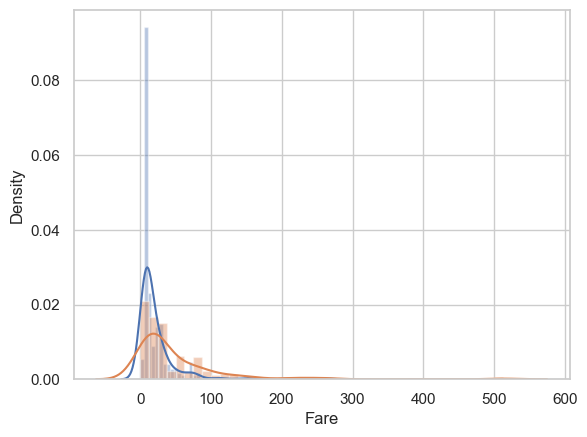

In [158]:
sns.distplot(train["Fare"][train["Survived"]==0])
sns.distplot(train["Fare"][train["Survived"]==1])

As  the fare increases, the orange curve (Survived = 1) is dominating the blue curve (Survived = 0).
Therefore, there is a strong mathematical correlation between "Fare" and "Survived".

In [159]:
train.Fare.isnull().sum()

0

In [160]:
train.Fare.dtype

dtype('float64')

In [161]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Feature: Cabin

In [162]:
# Percentage null values
round(((train.Cabin.isnull().sum()/len(train))*100),0)

77.0

The feature Cabin has 77% missing values. Let's drop this!

In [163]:
train = train.drop("Cabin", axis = 1)

In [164]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family,Family_Size,Ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr,1,Small,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs,1,Small,PC


### Feature: Embarked
#### Relavance of the feature:

In [165]:
train.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [166]:
train.Embarked.isnull().sum()

2

In [167]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [168]:
 train['Embarked']= train['Embarked'].astype("object")

## Create new data frame

In [169]:
df=pd.DataFrame()

In [171]:
df["Survived"] = train["Survived"]
df["Pclass"] = train["Pclass"]
df["Title"] = train["Title"]
df["Sex"] = train["Sex"]

In [172]:
df['Age'] = pd.cut(train["Age"],[0,18,30,50,80])
df['Family_Size'] = train['Family_Size']
df["Ticket_type"] = train["Ticket_type"]

In [173]:
# For df
bin_cut = pd.cut(train["Fare"], bins=10)
f_interval = bin_cut.cat.categories[0]
new_interval = pd.Interval(0,f_interval.right)
bin_cut = bin_cut.cat.rename_categories({f_interval:new_interval})

df["Fare"] = bin_cut

In [176]:
df['Embarked'] = train['Embarked']

In [177]:
df.head()

,Survived,Pclass,Title,Sex,Age,Family_Size,Ticket_type,Fare,Embarked
0,0,3,Mr,1,"(18, 30]",Small,A/5,"(0.0, 51.233]",S
1,1,1,Mrs,0,"(30, 50]",Small,PC,"(51.233, 102.466]",C
2,1,3,Miss,0,"(18, 30]",Alone,STON/O2,"(0.0, 51.233]",S
3,1,1,Mrs,0,"(30, 50]",Small,6_Digit_Number,"(51.233, 102.466]",S
4,0,3,Mr,1,"(30, 50]",Alone,6_Digit_Number,"(0.0, 51.233]",S


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    object  
 2   Title        891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    category
 5   Family_Size  891 non-null    object  
 6   Ticket_type  891 non-null    object  
 7   Fare         891 non-null    category
 8   Embarked     889 non-null    object  
dtypes: category(2), int64(1), object(6)
memory usage: 51.3+ KB


## Feature Encoding

### For df (One hot encoding)

In [180]:
df_enc = pd.get_dummies(df, columns = ["Pclass","Title","Sex","Age","Family_Size","Ticket_type","Fare","Embarked"])
df_enc.head()

C:\Users\ayamo\AppData\Local\Temp\ipykernel_2684\1814498658.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_enc = pd.get_dummies(df, columns = ["Pclass","Title","Sex","Age","Family_Size","Ticket_type","Fare","Embarked"])


,Survived,Pclass_1,Pclass_2,Pclass_3,Title_,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,"Fare_(153.699, 204.932]","Fare_(204.932, 256.165]","Fare_(256.165, 307.398]","Fare_(307.398, 358.63]","Fare_(358.63, 409.863]","Fare_(409.863, 461.096]","Fare_(461.096, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Machine Learning Model - Decision Trees
### Let's seperate the data

In [181]:
# Select the dataframe
selected_df = df_enc

In [182]:
# Splitting the dataframe into data and output label
X = selected_df.drop("Survived", axis = 1) # data
y = selected_df["Survived"] # output target

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [184]:
y_pred = classifier.predict(X_test)

In [185]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.776536312849162

### The model is able to predict the survival of passengers with 77% accuracy.

Since this is a base model, there is a scope of improvement in the performance of the model using hyperparameter tuning.

We will use GridSearchCV to tune the hyperparameters and try to achieve the best possible accuracy.

### Hyperparameter Tuning
For the hyperparameter tuning, we will consider following Decision Tree parameters:

<ul>
     <li>Crierion</li>
     <li>Max Depth</li>
     <li>Minimum Sample Split</li>

</ul>

In [187]:
param_dict = {
 "criterion":["gini","entropy"],
 "max_depth":[None,5,10,15],
 "min_samples_split":[2, 5, 10]
}
grid = GridSearchCV(classifier,param_grid=param_dict,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

In [188]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [189]:
grid.best_score_

0.8454616588419406

GridSearchCV suggests the following parameters:

<ul>
     <li>Criterion: Entropy</li>
     <li>Max Depth:5</li>
     <li>Minimum Sample Split:10</li>
</ul>
The accuracy promised when these hyperparameters are used is 84%.